In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

Импорт данных

In [66]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


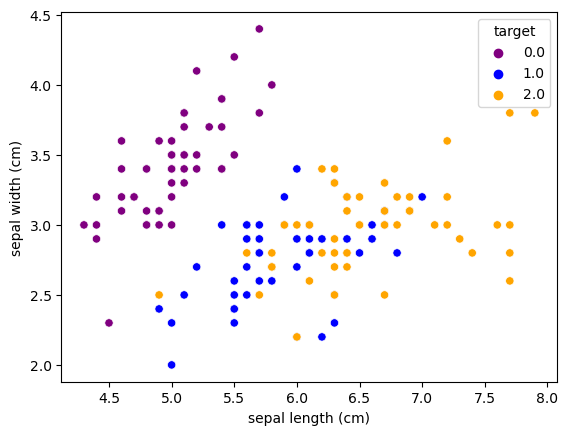

In [67]:
df_selected = df[['sepal length (cm)', 'sepal width (cm)', 'target']]
sns.scatterplot(df_selected, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=['purple', 'blue', 'orange'])
None

**1 задание**

Ненормализованные данные с Манхетеновским расстоянием

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_selected[['sepal length (cm)', 'sepal width (cm)']],\
                                                     df_selected['target'], test_size=0.3, random_state=8)

In [43]:
knn_manh = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)
knn_manh.fit(X_train, y_train)

KNeighborsClassifier(p=1)

/usr/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

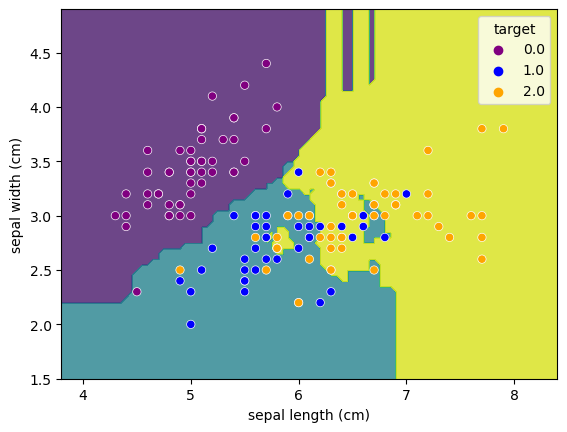

In [44]:
x_min, x_max = df_selected['sepal length (cm)'].min() - 0.5, df_selected['sepal length (cm)'].max() + 0.5
y_min, y_max = df_selected['sepal width (cm)'].min() - 0.5, df_selected['sepal width (cm)'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_manh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['purple', 'blue', 'orange']

plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(df_selected, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=colors)


Нормализованные данные с Манхетеновским расстоянием

In [70]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

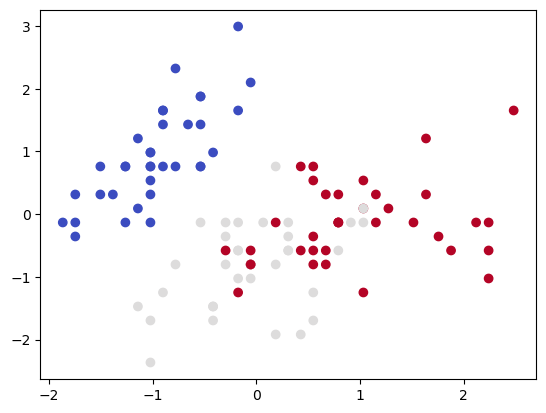

In [46]:
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, cmap='coolwarm', label='Test points')

In [47]:
knn_manh.fit(X_train_norm, y_train)
y_pred = knn_manh.predict(X_test_norm)

Accuracy: 0.6444444444444445
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.50      0.50      0.50        16
         2.0       0.47      0.50      0.48        14

    accuracy                           0.64        45
   macro avg       0.66      0.64      0.65        45
weighted avg       0.66      0.64      0.65        45



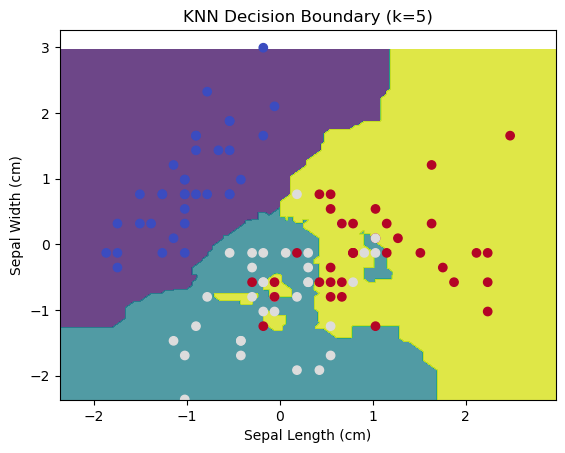

In [48]:
x_min, x_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
y_min, y_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_manh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['purple', 'blue', 'orange']

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, cmap='coolwarm', label='Test points')
plt.title(f'KNN Decision Boundary (k=5)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Нормализованные данные с Евклидовым расстоянием

In [49]:
knn_evk = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
knn_evk.fit(X_train_norm, y_train)
y_pred = knn_evk.predict(X_test_norm)
misclassified_test = X_test_norm[y_pred != y_test]

In [50]:
x_min, x_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
y_min, y_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_evk.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['purple', 'blue', 'orange']

Accuracy: 0.6444444444444445
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.50      0.50      0.50        16
         2.0       0.47      0.50      0.48        14

    accuracy                           0.64        45
   macro avg       0.66      0.64      0.65        45
weighted avg       0.66      0.64      0.65        45



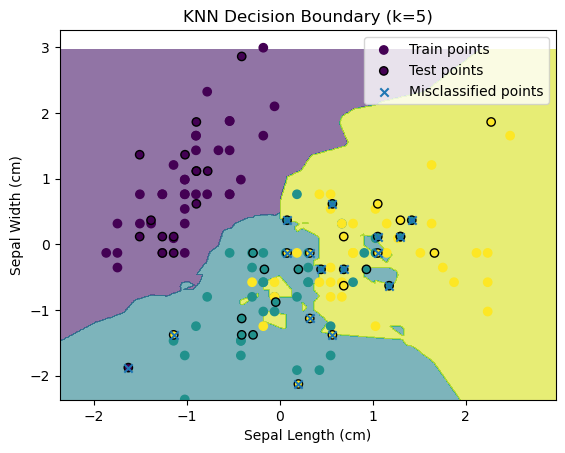

In [51]:
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, label='Train points')
plt.scatter(X_test_norm[:, 0], X_test_norm[:, 1], c=y_test, edgecolors='k', label='Test points')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], marker='x', label='Misclassified points')
plt.title(f'KNN Decision Boundary (k=5)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='best')

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
plt.show()
None

Возьмем побольше соседей

In [52]:
knn_evk_7 = KNeighborsClassifier(n_neighbors=9, weights='uniform', p=2)
knn_evk_7.fit(X_train_norm, y_train)
y_pred = knn_evk.predict(X_test_norm)
misclassified_test = X_test_norm[y_pred != y_test]

In [53]:
x_min, x_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
y_min, y_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_evk_7.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['purple', 'blue', 'orange']

Accuracy: 0.6444444444444445
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.50      0.50      0.50        16
         2.0       0.47      0.50      0.48        14

    accuracy                           0.64        45
   macro avg       0.66      0.64      0.65        45
weighted avg       0.66      0.64      0.65        45



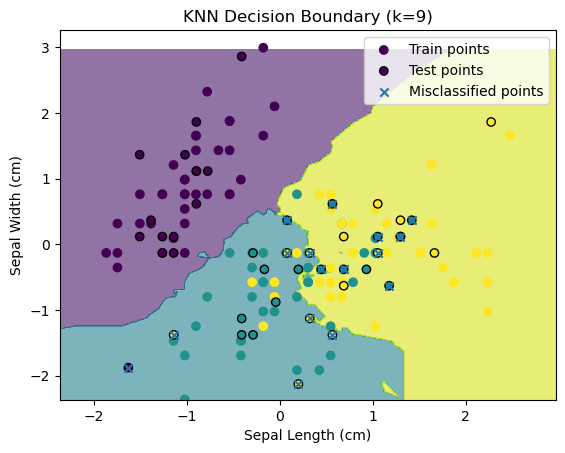

In [54]:
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, label='Train points')
plt.scatter(X_test_norm[:, 0], X_test_norm[:, 1], c=y_test, edgecolors='k', label='Test points')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], marker='x', label='Misclassified points')
plt.title(f'KNN Decision Boundary (k=9)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='best')

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
plt.show()
None

Изменим параметр _weights_ на _distance_

In [71]:
knn_dist = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
knn_dist.fit(X_train_norm, y_train)
y_pred = knn_dist.predict(X_test_norm)
misclassified_test = X_test_norm[y_pred != y_test]

In [72]:
x_min, x_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
y_min, y_max = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_dist.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['purple', 'blue', 'orange']

Accuracy: 0.6222222222222222
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.47      0.44      0.45        16
         2.0       0.44      0.50      0.47        14

    accuracy                           0.62        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.64      0.62      0.63        45



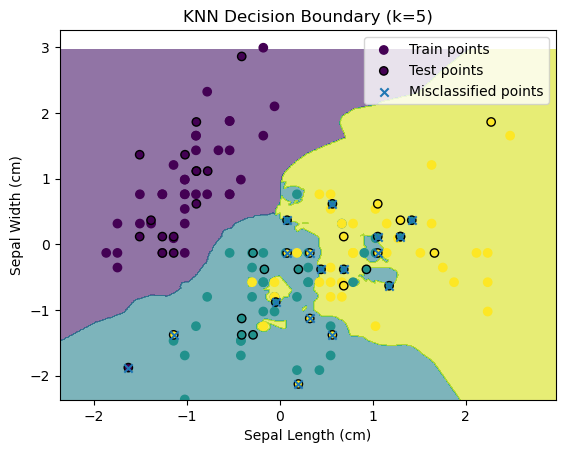

In [73]:
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, label='Train points')
plt.scatter(X_test_norm[:, 0], X_test_norm[:, 1], c=y_test, edgecolors='k', label='Test points')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], marker='x', label='Misclassified points')
plt.title(f'KNN Decision Boundary (k=5)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='best')

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
plt.show()
None

**2 задание**

In [58]:
df = pd.DataFrame()
for i in range(1, 6):
    df_dmp = pd.read_csv(f'gas+turbine+co+and+nox+emission+data+set/gt_201{i}.csv')
    df = pd.concat([df, df_dmp])

In [59]:
df.loc[df['CO'] >= 4.3, 'target'] = -1
df.loc[df['CO'] < 4.3, 'target'] = 1

In [60]:
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
X = scaler.fit_transform(X)
y = df['target']

5 folds

In [61]:
for k in [3, 5, 7, 9, 11]:
    model = KNeighborsClassifier(n_neighbors=k)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X, y, cv=kfold)
    accuracy = np.mean(scores)
    
    print(f'K = {k}, Recall: {accuracy}')

K = 3, Accuracy: 0.9573951796612785
K = 5, Accuracy: 0.9575856928662994
K = 7, Accuracy: 0.9568779246923101
K = 9, Accuracy: 0.9558162075817593
K = 11, Accuracy: 0.9548361564573252


10 folds

In [62]:
for k in [3, 5, 7, 9, 11]:
    model = KNeighborsClassifier(n_neighbors=k)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X, y, cv=kfold)
    accuracy = np.mean(scores)
    
    print(f'K = {k}, Accuracy: {accuracy}')

K = 3, Accuracy: 0.9586202912838779
K = 5, Accuracy: 0.9590013918157794
K = 7, Accuracy: 0.9582664535048904
K = 9, Accuracy: 0.956878083547777
K = 11, Accuracy: 0.9557618964975771


100 folds

In [63]:
for k in [3, 5, 7, 9, 11]:
    model = KNeighborsClassifier(n_neighbors=k)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X, y, cv=kfold)
    accuracy = np.mean(scores)
    
    print(f'K = {k}, Accuracy: {accuracy}')

K = 3, Accuracy: 0.9586202912838779
K = 5, Accuracy: 0.9590013918157794
K = 7, Accuracy: 0.9582664535048904
K = 9, Accuracy: 0.956878083547777
K = 11, Accuracy: 0.9557618964975771


**3 задание**

In [64]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели с Гауссовским ядром парзеновского окна
bandwidth = 0.1  # Выберите оптимальное значение ширины окна (может быть подобрано с использованием GridSearchCV)
model = KernelDensity(bandwidth=bandwidth, kernel='gaussian')

# Обучение модели
model.fit(X_train)

# Предсказание логарифмов плотности для тестового набора
log_densities = model.score_samples(X_test)

# Преобразование логарифмов плотности в предсказанные метки классов
predicted_labels = np.argmax(log_densities.reshape(-1, 1), axis=1)

# Оценка производительности модели
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.0
